In [78]:
# !pip install datadotworld
# !pip install datadotworld[pandas]

In [79]:
# !dw configure

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import datadotworld as dw

In [82]:
# drive.mount("/content/drive")

In [4]:
ls

drive/  sample_data/


In [5]:
cd drive/

/content/drive


In [6]:
ls

MyDrive/  Othercomputers/


In [7]:
cd "MyDrive/Colab Notebooks/"

/content/drive/MyDrive/Colab Notebooks


In [8]:
ls

dw1_day2.ipynb  dw_transform/


In [9]:
cd dw_transform/

/content/drive/MyDrive/Colab Notebooks/dw_transform


In [10]:
ls

GitHub.ipynb  LICENSE  README.md  transform_one/


In [11]:
!mkdir data

In [12]:
ls

data/  GitHub.ipynb  LICENSE  README.md  transform_one/


In [13]:
!echo "data" > .gitignore

In [15]:
!git add .gitignore

In [17]:
data = dw.load_dataset("datafiniti/mens-shoe-prices")

In [18]:
ls

data/  GitHub.ipynb  LICENSE  README.md  transform_one/


In [24]:
df = data.dataframes['7004_1']
df.shape

/usr/local/lib/python3.7/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.7/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


(19387, 48)

In [81]:
df.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
1821,AVpfUVo3ilAPnD_xZg-h,NaN,Nike,"All Men's Shoes,Shoes,Men's Shoes,Clothing",MultiColorMultiColor,NaN,2016-11-15T13:19:07Z,2016-11-15T13:19:07Z,"[{""dateSeen"":[""2016-11-15T13:19:07Z""],""sourceU...",NaN,8.865503e+11,"[{""key"":""Sport"",""value"":[""Training Shoes""]},{""...",NaN,https://i5.walmartimages.com/asr/f94cfe2f-26d5...,NaN,"0886550338158,886550338158,nike/844406999",Nike,844406 999,"[{""dateSeen"":[""2016-11-15T13:19:07Z""],""name"":""...",Nike Men's Train Quick Training Shoe,140.00,140.00,NaN,NaN,new,NaN,USD,2016-11-15T13:19:07Z,2016-11-05T00:00:00Z,NaN,false,shoezoo - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Nike-Men-s-Train-Qu...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Nike-Men-s-Train-Qu...,886550338158,NaN,NaN,NaN
15259,AVpfjGN-LJeJML43_M20,NaN,K2,"Clothing,Shoes,Men's Shoes,Men's Boots",NaN,NaN,2016-10-05T22:22:10Z,2016-10-05T22:22:10Z,"[{""dateSeen"":[""2016-10-05T22:22:10Z""],""sourceU...",NaN,8.867456e+11,"[{""key"":""Manufacturer Part Number"",""value"":[""B...",NaN,https://i5.walmartimages.com/asr/ea358426-92de...,NaN,"0886745604228,k2/b1603009mss9,886745604228",NaN,B1603009-MSS-9,"[{""dateSeen"":[""2016-10-05T22:22:10Z""],""name"":""...",K2 Men's Raider: Snowboard Boots,199.95,199.95,NaN,NaN,new,NaN,USD,2016-10-05T22:22:10Z,2016-10-04T00:00:00Z,NaN,false,Mobius Commerce - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/K2-Men-s-RAIDER-SNO...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/K2-Men-s-RAIDER-SNO...,886745604228,NaN,NaN,NaN
750,AVpfRy3RLJeJML436Iwm,NaN,Alfani,"Bags & Accessories,Men's Accessories,Clothing,...",NaN,NaN,2016-01-02T03:26:04Z,2016-04-05T22:34:23Z,NaN,5 in x 2 in x 5 in,NaN,"[{""key"":""Style"",""value"":[""Suspenders""]}]",NaN,http://c.shld.net/rpx/i/s/pi/mp/10146435/prod_...,NaN,"alfani/18311db436,alfanimensvneckcontrastshirt...",NaN,18311DB436,NaN,Alfani Men's V-neck Contrast Shirt Dress Blues...,19.99,19.99,NaN,NaN,NaN,NaN,USD,2016-01-02T03:26:04Z,2016-03-31T00:00:00Z,NaN,false,oh!Dreamy,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN
4579,AVpfULewilAPnD_xZdpC,NaN,Bgood,"Men's Jewelry,Men's Accessories,Clothing, Shoe...",NaN,NaN,2016-01-01T02:16:44Z,2016-03-30T21:14:04Z,NaN,6 in x 3 in x 3 in,NaN,NaN,NaN,http://c.shld.net/rpx/i/s/pi/mp/38936/prod_731...,NaN,"bgood/modelu153268,bgoodmultipatternlovelyconf...",NaN,Model-U153268,NaN,Bgood Multi Pattern Lovely Confused Doll Acces...,32.52,32.52,NaN,NaN,NaN,NaN,USD,2016-01-01T02:16:44Z,2016-03-30T00:00:00Z,NaN,false,New Occidental,NaN,NaN,NaN,NaN,NaN,http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.sears.com/content/...",http://www.sears.com/content/pdp/products/pric...,NaN,NaN,NaN,NaN
10121,AVpfWzNu1cnluZ0-jR4N,NaN,Puma,"Men,Shoes,Motorsport",NaN,NaN,2016-02-02T23:18:46Z,2016-02-02T23:18:46Z,NaN,NaN,NaN,NaN,NaN,http://pumaecom.scene7.com/is/image/PUMAECOM/4...,NaN,puma/41730201,NaN,417302_01,NaN,Speed Cat Trainers,100.00,100.00,NaN,NaN,NaN,NaN,EUR,2016-02-02T23:18:46Z,2016-01-29T00:00:00Z,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,http://fr.puma.com/fr/en/pd/speed-cat-trainers...,NaN,NaN,NaN,NaN,NaN,http://fr.puma.com/fr/en/pd/speed-cat-trainers...,NaN,NaN,NaN,NaN


In [27]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [28]:
df.prices_currency.unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [29]:
df.prices_currency.value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
UnbeatableSale.com, Inc. - Walmart.com                    3
new                                                       3
PalmBeach Jewelry - Walmart.com                           3
New with box                                              3
Wholesale Costume and Party Supplies - Walmart.com        2
Shoes.com                                                 1
SHOEBACCA LTD. - Walmart.com                              1
New without tags                                          1
Name: prices_currency, dtype: int64

In [36]:
df.prices_currency.value_counts(normalize=True)

USD                                                   0.959246
AUD                                                   0.017503
CAD                                                   0.015691
EUR                                                   0.005541
GBP                                                   0.001139
UnbeatableSale.com, Inc. - Walmart.com                0.000155
new                                                   0.000155
PalmBeach Jewelry - Walmart.com                       0.000155
New with box                                          0.000155
Wholesale Costume and Party Supplies - Walmart.com    0.000104
Shoes.com                                             0.000052
SHOEBACCA LTD. - Walmart.com                          0.000052
New without tags                                      0.000052
Name: prices_currency, dtype: float64

In [55]:
df_usd = df[ df.prices_currency == "USD" ].copy()

In [56]:
df_usd.shape

(18524, 48)

In [57]:
df_usd.sample(5)

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
6975,AVpe4QTdLJeJML43xUys,NaN,New Balance,"Athletic,Clothing, Shoes & Accessories,Men's S...",White,NaN,2016-03-04T00:19:45Z,2016-03-22T01:08:46Z,NaN,NaN,7.399801e+11,"[{""key"":""Style"",""value"":[""Running, Cross Train...",NaN,http://i.ebayimg.com/images/g/dtIAAOSwo6lWHVmi...,NaN,"739980128663,0739980128663,newbalanceme481menu...",NaN,NaN,"[{""dateSeen"":[""2016-03-20T00:00:00Z""],""name"":""...",New Balance Me481 Men Us 8 4e White Running Sh...,41.99,41.99,NaN,NaN,New with box,NaN,USD,2016-03-04T00:19:45Z,2016-03-12T00:00:00Z,NaN,false,NaN,winning bid,NaN,FREE,NaN,NaN,http://www.ebay.com/itm/NIB-Mens-NEW-BALANCE-M...,NaN,NaN,NaN,8,"[{""sourceURLs"":[""http://www.ebay.com/itm/New-B...",http://www.ebay.com/itm/New-Balance-ME481-Men-...,739980128663,NaN,NaN,NaN
11379,AVpfhX-91cnluZ0-mPGm,NaN,Bugatchi,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",Vino,NaN,2016-11-15T13:18:15Z,2016-11-15T13:18:15Z,"[{""dateSeen"":[""2016-11-15T13:18:15Z""],""sourceU...",NaN,8.492380e+11,"[{""key"":""Heel Height"",""value"":[""0.75 Inches""]}...",NaN,https://i5.walmartimages.com/asr/81bed531-4b08...,NaN,"bugatchi/b112c07,849238010807,0849238010807",Bugatchi,B112C07,"[{""dateSeen"":[""2016-11-15T13:18:15Z""],""name"":""...",Bugatchi Mens Vino Leather Slip On Loafers,55.99,55.99,NaN,NaN,new,NaN,USD,2016-11-15T13:18:15Z,2016-11-11T00:00:00Z,NaN,false,"BHFO, Inc. - Walmart.com",NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Bugatchi-Mens-Vino-...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Bugatchi-Mens-Vino-...,849238010807,NaN,NaN,NaN
10583,AVpfTvcnLJeJML436wzk,NaN,Nike,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-11-07T01:11:40Z,2016-11-07T01:11:40Z,"[{""dateSeen"":[""2016-11-07T01:11:40Z""],""sourceU...",NaN,8.834121e+11,"[{""key"":""Season"",""value"":[""All-Season""]},{""key...",NaN,https://i5.walmartimages.com/asr/3e154ed2-4ba9...,NaN,"883412129916,0883412129916,nike/653617002",Nike,653617 002,"[{""dateSeen"":[""2016-11-07T01:11:40Z""],""name"":""...",Nike Reax Run 9 Round Toe Synthetic Sneakers,58.99,58.99,NaN,NaN,new,NaN,USD,2016-11-07T01:11:40Z,2016-11-07T01:11:40Z,NaN,true,ApparelSave - Walmart.com,REDUCED USD 26.01,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Nike-Reax-Run-9-Men...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Nike-Reax-Run-9-Men...,883412129916,NaN,NaN,NaN
16963,AVpfeqwA1cnluZ0-ldGr,NaN,Ralph Lauren,"Men,Dress,Shoes",Black,NaN,2015-08-18T16:43:06Z,2016-02-25T20:53:54Z,NaN,NaN,NaN,NaN,NaN,http://www.ralphlauren.com/graphics/product_im...,NaN,"ralphlauren/68448976,marlowcalfskintasselloafe...",NaN,68448976,"[{""address"":""650 Madison Ave C1"",""availability...",Marlow Calfskin Tassel Loafer,895.00,895.00,NaN,Black,New,NaN,USD,2015-08-18T16:43:06Z,2015-08-11T00:00:00Z,NaN,false,www.ralphlauren.com,NaN,The full amount will be credited to the origin...,FREE SHIPPING ON ORDERS OVER $125. $5 FLAT-RAT...,7 EE,NaN,http://www.ralphlauren.com/product/index.jsp?p...,NaN,NaN,NaN,NaN,"[{""sourceURLs"":[""http://www.ralphlauren.com/pr...",http://www.ralphlauren.com/product/index.jsp?p...,NaN,NaN,NaN,NaN
14559,AVpe8fwjLJeJML43y5ws,NaN,New Balance,"All Men's Shoes,Shoes,Men's Shoes,Clothing",BlackGold RushGrey,NaN,2016-10-17T16:28:48Z,2017-01-27T01:25:42Z,"[{""dateSeen"":[""2016-10-17T16:28:48Z""],""sourceU...",NaN,8.895162e+11,"[{""key"":""Season"",""value"":[""All-Season""]},{""key...",NaN,https://i5.walmartimages.com/asr/58e24184-480b...,NaN,"889516210635,0889516210635,newbalance/mt610lb

In [58]:
df_usd.prices_amountmin.min()

'0.00'

In [59]:
df_usd.prices_amountmin.max()

'999.00'

In [62]:
df_usd.prices_amountmin.head()

0    39.89
1    51.99
2    40.02
3    50.31
4    46.26
Name: prices_amountmin, dtype: object

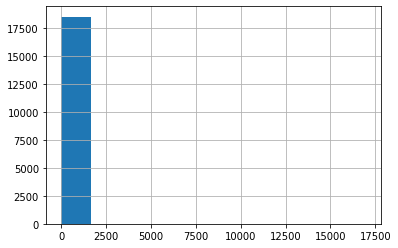

In [63]:
df_usd["prices_amountmin"] = df_usd.prices_amountmin.astype(np.float)
df_usd["prices_amountmin"].hist()

In [66]:
filter_max = np.percentile(df_usd["prices_amountmin"], 99)

In [70]:
df_usd_filter = df_usd[df_usd["prices_amountmin"] < filter_max]

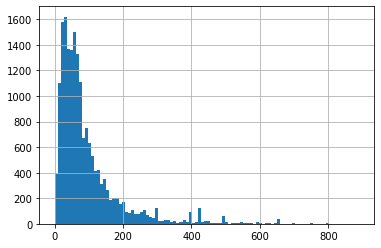

In [72]:
df_usd_filter.prices_amountmin.hist(bins=100)

In [73]:
ls

data/  GitHub.ipynb  LICENSE  README.md  transform_one/


In [75]:
df.to_csv('data/shoes_prices.csv', index=False)

In [76]:
ls data/

shoes_prices.csv


In [85]:
df_usd_filter.to_csv("dw_transform/data/men_shoes.csv", index=False)

In [86]:
!cat dw_transform/.gitignore

data
